# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_combined = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_study_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [27]:
# Checking the number of mice.
Mice_Count = mouse_study_combined["Mouse ID"].nunique()
Mice_Count

249

In [28]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = mouse_study_combined[mouse_study_combined.duplicated(subset = ['Mouse ID', 'Timepoint'], keep=False)]
print(duplicates)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [29]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_ids = duplicates['Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_cleaned = mouse_study_combined[~mouse_study_combined['Mouse ID'].isin(duplicate_mouse_ids)]
mouse_study_cleaned

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [31]:
# Checking the number of mice in the clean DataFrame.
mouse_study_cleaned_count = mouse_study_cleaned['Mouse ID'].nunique()
mouse_study_cleaned_count

248

## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats = mouse_study_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
**{
    "Mean Tumor Volume" : "mean",
    "Median Tumor Volume": "median",
    "Tumor Volume Variance": "var",
    "Tumor Volume Std.Dev.":  "std",
    "Tumor Volume SEM": "sem"
 }
).reset_index()

summary_stats

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

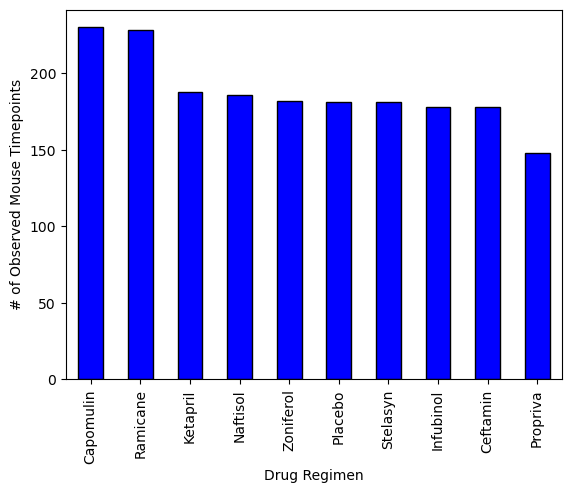

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = mouse_study_cleaned["Drug Regimen"].value_counts()
regimen_counts.plot(kind="bar",color="blue", edgecolor = "black")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


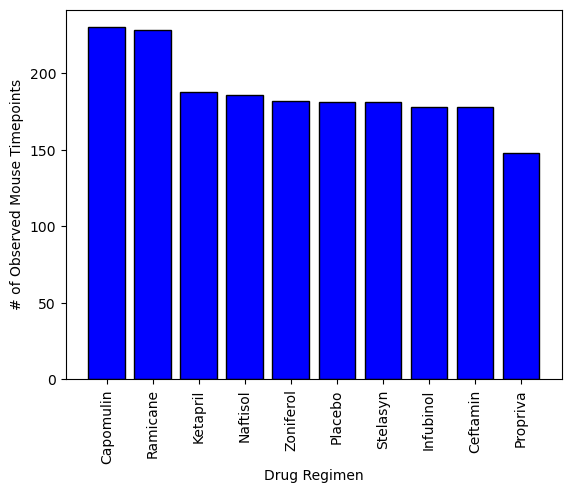

In [34]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(regimen_counts.index,regimen_counts.values,color="blue",edgecolor="black")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

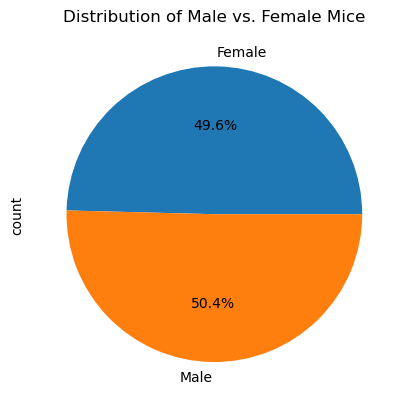

In [35]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_gender_counts = mouse_study_cleaned.groupby("Sex")["Mouse ID"].nunique()
unique_gender_counts
# Make the pie chart
unique_gender_counts.plot.pie(autopct="%1.1f%%")
plt.ylabel("count")
plt.title("Distribution of Male vs. Female Mice")
plt.show()

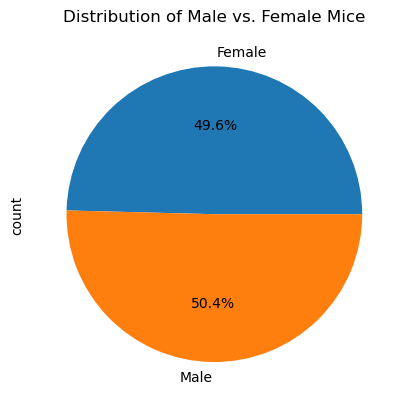

In [36]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
plt.pie(unique_gender_counts.values, labels=unique_gender_counts.index, autopct="%1.1f%%")
plt.ylabel("count")
plt.title("Distribution of Male vs. Female Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_data = mouse_study_cleaned[mouse_study_cleaned["Drug Regimen"].isin(treatments)]
# Start by getting the last (greatest) timepoint for each mouse
final_timepoints = filtered_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = final_timepoints.merge(filtered_data, on=["Mouse ID", "Timepoint"], how="left")
final_tumor_volume = final_tumor_volume[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
final_tumor_volume

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a275,Ceftamin,45,62.999356
3,a411,Ramicane,45,38.407618
4,a444,Ramicane,45,43.047543
...,...,...,...,...
95,y769,Ceftamin,45,68.594745
96,y793,Capomulin,45,31.896238
97,y865,Ceftamin,45,64.729837
98,z578,Ramicane,45,30.638696


In [42]:
# Create an Empty List to Store Tumor Volume Data
tumor_volume_data = []

# Dictionary to store outliers
outliers_dict = {}

# Put treatments into a list for for loop (and later for plot labels)
for drug in treatments:
    drug_data = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_volume_data.append(drug_data)

# Calculate the IQR and quantitatively determine if there are any potential outliers.
    Q1 = drug_data.quantile(0.25)
    Q3 = drug_data.quantile(0.75)
    iqr_value = Q3 - Q1

    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - (1.5 * iqr_value)
    upper_bound = Q3 + (1.5 * iqr_value)
    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    outliers_dict[drug] = outliers.tolist()

    # Results
    print(f"{drug}: Q1 = {Q1}, Q3 = {Q3}, IQR = {iqr_value}")
    print(f"Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")
    print(f"Potential Outliers: {outliers.tolist()}\n")

Capomulin: Q1 = 32.37735684, Q3 = 40.1592203, IQR = 7.781863460000004
Lower Bound = 20.70456164999999, Upper Bound = 51.83201549
Potential Outliers: []

Ramicane: Q1 = 31.56046955, Q3 = 40.65900627, IQR = 9.098536719999998
Lower Bound = 17.912664470000003, Upper Bound = 54.30681135
Potential Outliers: []

Infubinol: Q1 = 54.04860769, Q3 = 65.52574285, IQR = 11.477135160000003
Lower Bound = 36.83290494999999, Upper Bound = 82.74144559000001
Potential Outliers: [36.3213458]

Ceftamin: Q1 = 48.72207785, Q3 = 64.29983003, IQR = 15.577752179999997
Lower Bound = 25.355449580000002, Upper Bound = 87.66645829999999
Potential Outliers: []



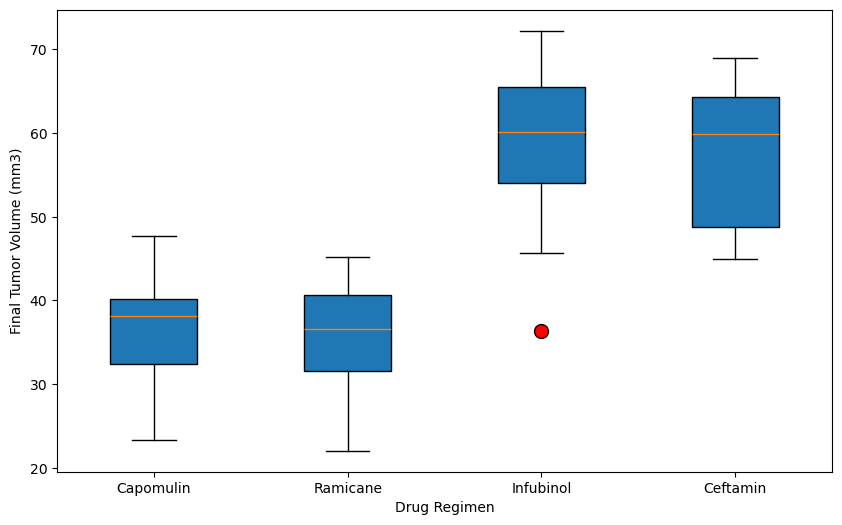

In [76]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10,6))
plt.boxplot(tumor_volume_data, tick_labels=treatments, patch_artist=True, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 10})

# Add title and labels
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")


plt.show()

## Line and Scatter Plots

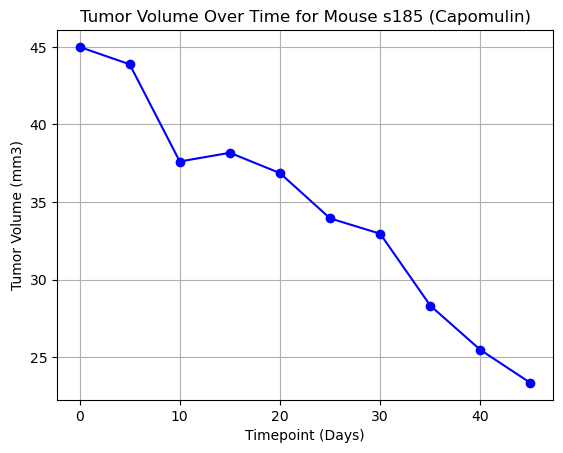

In [80]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse_id = mouse_study_cleaned.loc[mouse_study_cleaned["Drug Regimen"]=="Capomulin", "Mouse ID"].iloc[0]
mouse_data = mouse_study_cleaned.loc[mouse_study_cleaned["Mouse ID"] == single_mouse_id]

plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker='o', linestyle='-',color="b")
plt.title(f"Tumor Volume Over Time for Mouse {single_mouse_id} (Capomulin)")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)

plt.show()

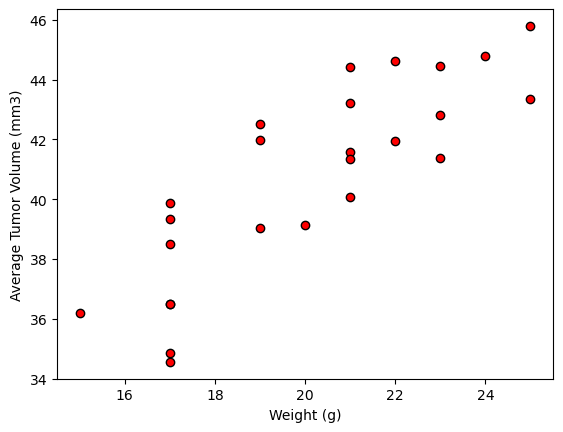

In [85]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = mouse_study_cleaned[mouse_study_cleaned["Drug Regimen"]=="Capomulin"]

avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

plt.scatter(mouse_weight, avg_tumor_volume, color="r", edgecolors="black")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

Correlation Coefficient Between Mouse Weight and Average Tumor Volume: 0.84


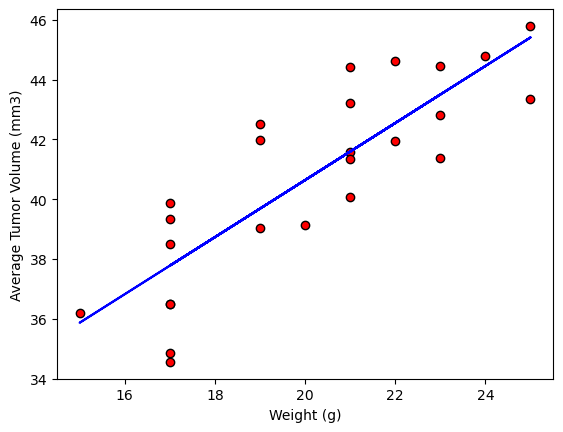

In [89]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

correlation = avg_tumor_volume.corr(mouse_weight)
print(f"Correlation Coefficient Between Mouse Weight and Average Tumor Volume: {correlation:.2f}")

slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, avg_tumor_volume)

regression_values = slope * mouse_weight + intercept

plt.scatter(mouse_weight,avg_tumor_volume,color="r", edgecolors="black", label="Mouse Data")
plt.plot(mouse_weight,regression_values,color='b', label=f'y = {slope:.2f}x + {intercept:.2f}')

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()